# Hypothesis: More people would want all sync classes than there are biology majors.

In [53]:
%reload_ext autoreload
%autoreload 2

## First I will read the csv and convert it to a column-oriented data table.

In [54]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select the `primary_major` colummn. 
Here are the first five rows. 

In [55]:
from data_utils import select, head
from tabulate import tabulate

major: dict[str, list[str]] = select(columns, ["primary_major"])
data_cols_major: dict[str, list[str]] = head(major, 5)

tabulate(data_cols_major, data_cols_major.keys(), "html")

primary_major
Advertising and Public Relations
Anthropology
Biology
Biology
Biology


## Then, I select for the column `all_sync`.
The first five rows of this row are as below.

In [56]:
all_sync: dict[str, list[str]] = select(columns, ["all_sync"])
data_cols_pre: dict[str, list[str]] = head(all_sync, 5)

tabulate(data_cols_pre, data_cols_pre.keys(), "html")

all_sync
2
4
1
1
1


## I then will use the `column_values` function to isolate just the values of the `all_sync` column.

In [57]:
from data_utils import column_values

values: list[str] = column_values(data_rows, "all_sync")

## Next, I will use the output from above to filter out all answers not 5 or higher.
These numbers represent the students who would rather have all classes synchronous.

In [58]:
from data_utils import filter

filtered_list: list[str] = filter(values)

## I will now loop through the `primary_major` and find the length of the `filtered_list` from above in order to compare the two lists.

In [59]:
from data_utils import count

biology_count =  count(major["primary_major"])
print(f"Biology majors: {biology_count['Biology']}")

sync_count = len(filtered_list)
print(f"Want all synchronous classes: {sync_count}")

Biology majors: 59
Want all synchronous classes: 165


## Finally, I will create a graph that shows the difference between the two answers.

<AxesSubplot:>

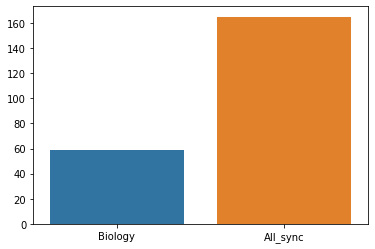

In [64]:
import seaborn 

seaborn.barplot(x=["Biology", "All_sync"], y=[biology_count["Biology"], sync_count])

# In conclusion, the data is showing that more people do wish for all of the lectures be held synchronously than there are students who are biology majors.